# PROYECTO NETFLIX

In [9]:
# Importamos las librerias necesarias
# ------------------------------------
import pandas as pd # Para manejo de datos en dataframes
import numpy as np # Para operaciones matematicas
import matplotlib.pyplot as plt  # Para graficos
import seaborn as sns # Para graficos estadisticos


In [10]:
# Cargamos el dataset
# ------------------------------------
file_path = "./csv/netflix_titles.csv"
file_path2 = "./csv/Netflix Userbase.csv"

In [11]:
# Función para cargar el dataset y mostrar la información
# ------------------------------------
def cargar_dataset(file_path):
    df = pd.read_csv(file_path)
    print(df.head())
    print(df.info())
    return df

# Función para explorar el dataset
# ------------------------------------
def explorar_dataset(df):
    # Mostramos la cantidad de filas y columnas
    print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")
    # Mostramos las columnas
    print(df.columns)
    # Mostramos los tipos de datos
    print(df.dtypes)
    # Mostramos los valores nulos
    print(df.isnull().sum())
    # Mostramos los valores duplicados
    print(df.duplicated().sum())
    # Mostramos las estadísticas del dataset
    print(df.describe())
    # Mostramos la cantidad de valores únicos de todas las columnas
    print(df.nunique())

# Función para homogeneizar y tipo de columna
# ------------------------------------
def homogeneizar_y_tipo_columna(df):
    # Homogeneizar nombres de columnas
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    # Cambiar tipo de columna
    if 'title' in df.columns:
        df['title'] = df['title'].astype(str)
    return df


# Función para tratar los valores nulos y duplicados
# ------------------------------------
def tratar_valores_nulos_duplicados(df):
    # Calculamos el porcentaje de valores nulos
    print(df.isnull().mean() * 100)
    # Eliminamos las columnas que no vamos a utilizar con un porcentaje de valores nulos mayor al 70%
    columnas_a_eliminar = df.columns[df.isnull().mean() > 0.7]
    df.drop(columnas_a_eliminar, axis=1, inplace=True)
    # Eliminamos las filas con valores nulos
    df.dropna(inplace=True)
    # Calculamos el porcentaje de valores duplicados
    print(df.duplicated().mean() * 100)
    # Eliminamos los duplicados si los hay
    df.drop_duplicates(inplace=True)
    # Reseteamos el índice
    df.reset_index(drop=True, inplace=True)
    return df

# Función para limpiar el dataset
# ------------------------------------
def limpiar_dataset(df):
    # Homogeneizar y renombrar columnas
    df = homogeneizar_y_tipo_columna(df)
    # Tratar valores nulos y duplicados
    df = tratar_valores_nulos_duplicados(df)
    # Mostramos la información del dataset limpio
    print(df.head())
    print(df.info())
    return df

# Función para realizar un análisis exploratorio de datos
# ------------------------------------
def analisis_exploratorio(df):
    # Mostramos la cantidad de películas y series
    print(df['type'].value_counts())
    # Mostramos la cantidad de películas y series por país
    print(df['country'].value_counts())
    # Mostramos la cantidad de películas y series por rating
    print(df['rating'].value_counts())
    # Mostramos la cantidad de películas y series por director
    print(df['director'].value_counts())
    # Mostramos la cantidad de películas y series por actor
    print(df['cast'].value_counts())
    # Mostramos la cantidad de películas y series por género
    print(df['listed_in'].value_counts())
    # Mostramos la cantidad de películas y series
    return df


# Función para guardar el dataset
# ------------------------------------
def guardar_dataset(df):
    df.to_csv('netflix_data_clean.csv', index=False)



  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

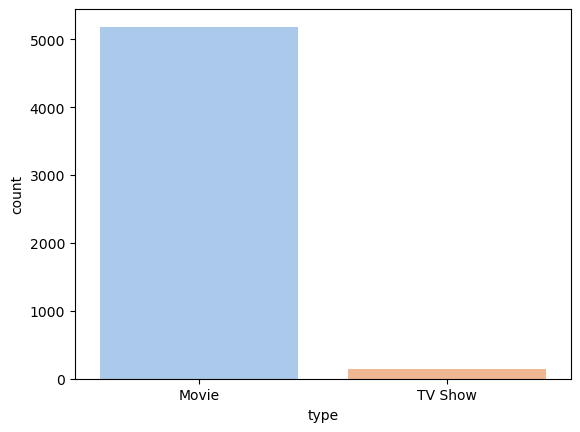

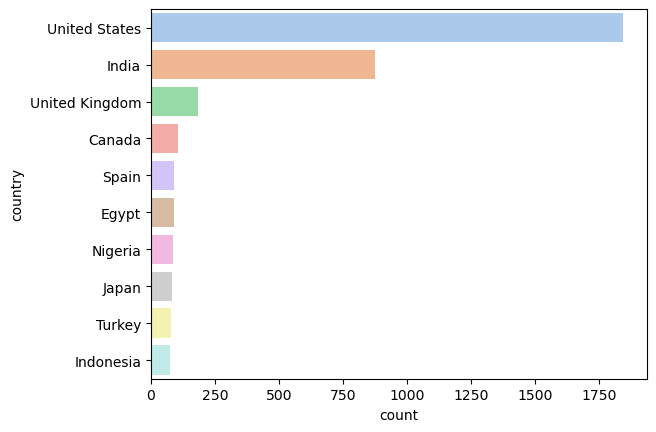

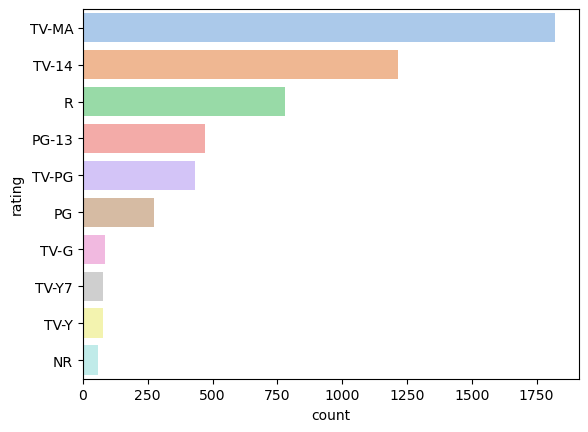

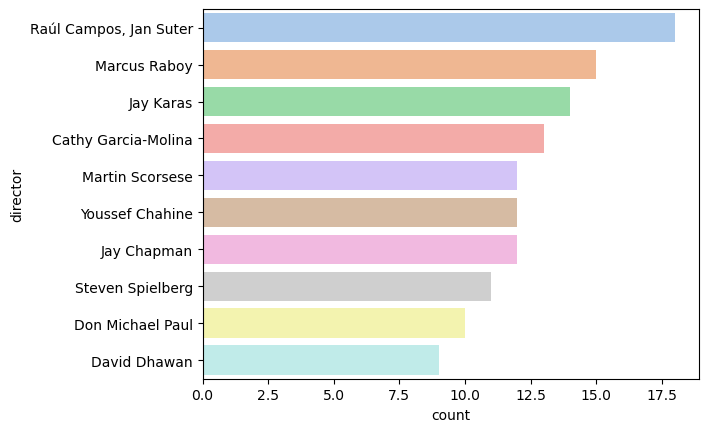

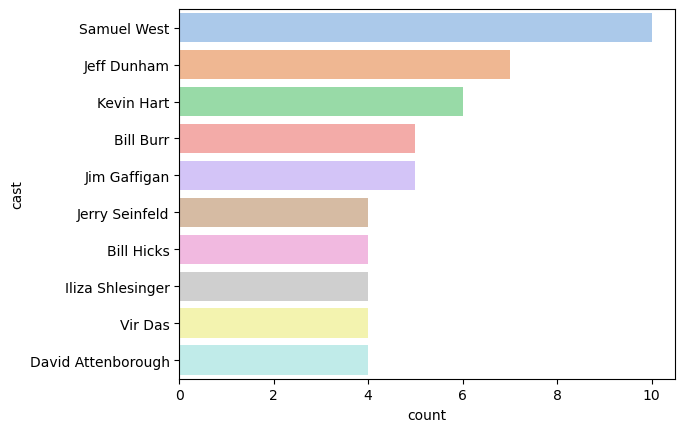

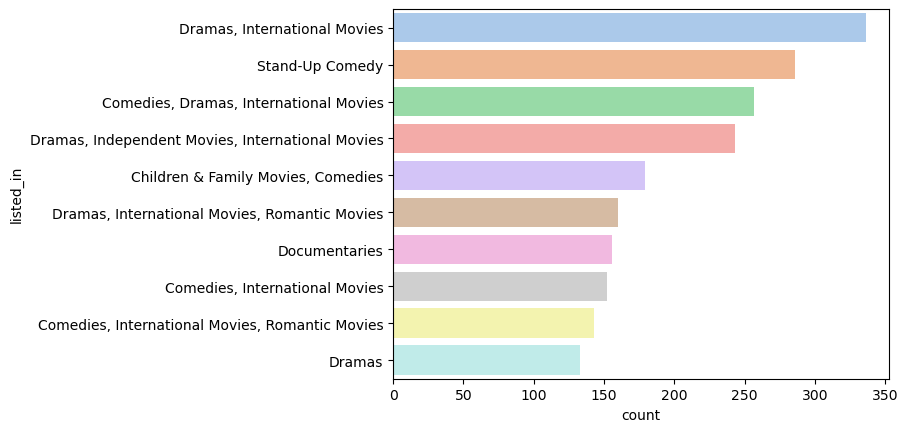

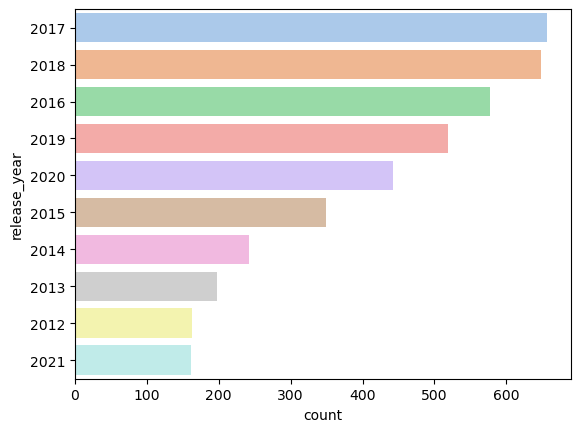

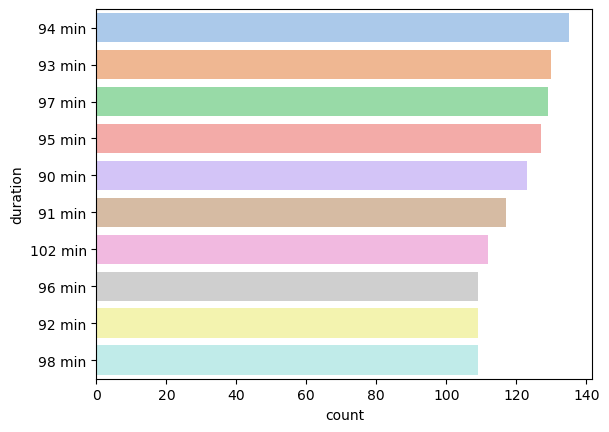

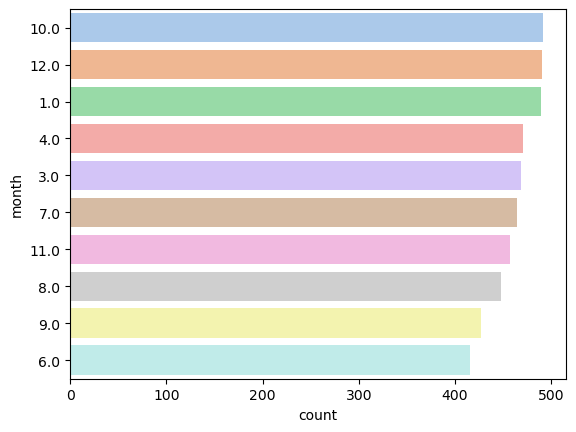

In [12]:
# Llamamos a las funciones
# ------------------------------------
df_netflix_titles = cargar_dataset(file_path)
df_netflix_userbase = cargar_dataset(file_path2)

# Exploramos el dataset
# ------------------------------------
explorar_dataset(df_netflix_titles)
explorar_dataset(df_netflix_userbase)

# Limpiamos el dataset
# ------------------------------------
df_netflix_titles = limpiar_dataset(df_netflix_titles)
df_netflix_userbase = limpiar_dataset(df_netflix_userbase)

# Guardamos los datasets limpios
# ------------------------------------
guardar_dataset(df_netflix_titles)
guardar_dataset(df_netflix_userbase)

# Realizamos un análisis exploratorio de datos
# ------------------------------------
df_netflix = analisis_exploratorio(df_netflix_titles)

# Mostramos los gráficos
# ------------------------------------
# Gráfico de barras de la cantidad de películas y series
sns.countplot(x='type', data=df_netflix, palette='pastel')
plt.show()

# Gráfico de barras de la cantidad de películas y series por país
sns.countplot(y='country', data=df_netflix, order=df_netflix['country'].value_counts().index[:10], palette='pastel')
plt.show()

# Gráfico de barras de la cantidad de películas y series por rating
sns.countplot(y='rating', data=df_netflix, order=df_netflix['rating'].value_counts().index[:10], palette='pastel')
plt.show()

# Gráfico de barras de la cantidad de películas y series por director
sns.countplot(y='director', data=df_netflix, order=df_netflix['director'].value_counts().index[:10], palette='pastel')
plt.show()

# Gráfico de barras de la cantidad de películas y series por actor
sns.countplot(y='cast', data=df_netflix, order=df_netflix['cast'].value_counts().index[:10], palette='pastel')
plt.show()

# Gráfico de barras de la cantidad de películas y series por género
sns.countplot(y='listed_in', data=df_netflix, order=df_netflix['listed_in'].value_counts().index[:10], palette='pastel')
plt.show()

# Gráfico de barras de la cantidad de películas y series por año de lanzamiento
sns.countplot(y='release_year', data=df_netflix, order=df_netflix['release_year'].value_counts().index[:10], palette='pastel')
plt.show()

# Gráfico de barras de la cantidad de películas y series por duración
sns.countplot(y='duration', data=df_netflix, order=df_netflix['duration'].value_counts().index[:10], palette='pastel')
plt.show()

# Gráfico de barras de la cantidad de películas y series por mes de lanzamiento
df_netflix['month'] = pd.to_datetime(df_netflix['date_added'], errors='coerce').dt.month
sns.countplot(y='month', data=df_netflix, order=df_netflix['month'].value_counts().index[:10], palette='pastel')
plt.show()
